# Purpose: find games with problematic play-by-play data. Some have a very low number of marked events which should be a criterion for rejection

In [1]:
from ReinforcementLearning.NHL.playerstats.nhl_player_stats import *
from ReinforcementLearning.NHL.playbyplay.game import *

In [2]:
# Pointers to the data
# repoCode    =   '/Users/younes_zerouali/Documents/Stradigi/Code/NHL_stats_SL'
# repoCode    =   '/Users/luisd/dev/NHL_stats'
repoCode    =   '/home/younesz/Documents/Code/NHL_stats_SL'
db_root     =   '/home/younesz/Documents/Databases/Hockey'        #This is the location of the Hockey database
# db_root     =   '/Users/younes_zerouali/Documents/Stradigi/Databases/Hockey'
# db_root     =   '/Users/luisd/dev/NHL_stats/data'
repoPbP     =   path.join(db_root, 'PlayByPlay')
repoPSt     =   path.join(db_root, 'PlayerStats/player')
repoModel   =   path.join(repoCode, 'ReinforcementLearning/NHL/playerstats/offVSdef/Automatic_classification/MODEL_backup_trainedonallseasons_rankstatprediction')
repoModel   =   path.join(repoCode, 'ReinforcementLearning/NHL/playerstats/offVSdef/Automatic_classification/MODEL_perceptron_1layer_10units_relu')
repoSave    =   None #path.join(repoCode, 'ReinforcementLearning/NHL/playbyplay/data')

In [3]:
# === First list seasons
seasons  =  ut_find_folders(repoPbP)

# Prep containers
gmInfo   =  pd.DataFrame(columns=['allE', 'filtE'])

# Loop on seasons
print('Launching analysis\n')
for iS in seasons:
    
    print('\tAnalysing season %s (%i/%i): ' %(iS, seasons.index(iS)+1, len(seasons)) )
    # List all games
    iSea   =  Season(iS)
    iSea.list_game_ids(repoPbP, repoPSt)
    
    # Loop on games
    count  =  0
    for iG in iSea.games_id['gcode']:
        
        # pull data
        iSea.game_active.switch_to_game(iG)
        iSea.game_active.pull_line_shifts('both', minduration=20)
        allE      =  len(iSea.game_active.lineShifts)
        
        # Filter for regulartime and equalstrength
        iSea.game_active.pick_regulartime()
        iSea.game_active.pick_equalstrength()
        filtE     =  len(iSea.game_active.lineShifts)
        
        # Store
        gmInfo    =  pd.concat( (gmInfo, pd.DataFrame( np.reshape([allE, filtE], [1,-1]), columns=['allE', 'filtE'])), ignore_index=True )
        
        count+=1
        if count % 50 == 0:
            # the exact output you're looking for:
            stdout.write("Game %i/%i: [%-40s] %d%%, completed" % (count, len(iSea.games_id), '=' * int(count / len(iSea.games_id) * 40), 100 * count / len(iSea.games_id)))
            stdout.flush()
        
    print('done\n')
    

Launching analysis

	Analysing season Season_20142015 (1/14): 
	

NameError: name 'games' is not defined

# VISU: check histograms

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Distribution: nb of filtered events per game')

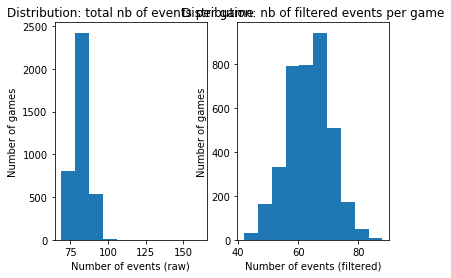

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

Fig  =  plt.figure()
Ax1  =  Fig.add_subplot(121)
Ax1.hist( np.reshape(gmInfo['allE'], [-1,1]) )
Ax1.set_xlabel('Number of events (raw)')
Ax1.set_ylabel('Number of games')
Ax1.set_title('Distribution: total nb of events per game')

Ax2  =  Fig.add_subplot(122)
Ax2.hist( np.reshape(gmInfo['filtE'], [-1,1]) )
Ax2.set_xlabel('Number of events (filtered)')
Ax2.set_ylabel('Number of games')
Ax2.set_title('Distribution: nb of filtered events per game')

